In [4]:
import os
import sys
import platform

print(sys.version)
print(platform.processor(), '- CPU count:', os.cpu_count())

3.8.2 (tags/v3.8.2:7b3ab59, Feb 25 2020, 23:03:10) [MSC v.1916 64 bit (AMD64)]
Intel64 Family 6 Model 142 Stepping 12, GenuineIntel - CPU count: 8


In [5]:
from collections import defaultdict
from time import time

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


pd.options.display.float_format = '{:.2f}'.format

In [6]:
from lin_kernighan.algorithms.structures.matrix import adjacency_matrix
from lin_kernighan.algorithms.utils.generator import generator
from lin_kernighan.tabu_proc_search import TabuProcSearch
from lin_kernighan.tabu_search import TabuSearch

In [66]:
def draw_x_y(frame, x, y):
    plt.plot(frame[x], frame[y], 'r--')
    plt.grid('both')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

def itersec_proc(size, iterations, max_proc, tries=5):
    """ График [итераций за секунду] / [кол-во процессов]
    size: размер задачки
    iterations: кол-во итераций, выполняемых процессом
    max_proc: максимальное кол-во процессов в графике
    """
    tsp = generator(size)
    matrix = adjacency_matrix(tsp)
    frame = pd.DataFrame()
    
    for _ in range(tries):
        f = defaultdict(list)
        
        for i in range(2, max_proc + 1):
            t_start = time()
            search = TabuProcSearch('two_opt', matrix, proc=i)
            search.optimize(iterations=iterations)
            f['time'].append(time() - t_start)
            f['process'].append(i)

        f = pd.DataFrame(f)
        f['iter/sec'] = f['process'] * iterations / f['time']
        if len(frame) != 0:
            frame['iter/sec'] += f['iter/sec']
        else:
            frame['iter/sec'] = f['iter/sec']
            frame['process'] = f['process']
            
    frame['iter/sec'] /= tries
    draw_x_y(frame, 'process', 'iter/sec')   
    
    
def sec_iter(size, start=50, stop=150, step=10, tries=3):
    """ График [секунды] / [итерации]
    size: размер задачки
    max_proc: максимальное кол-во процессов в графике
    """
    tsp = generator(size)
    matrix = adjacency_matrix(tsp)
    
    for process in range(2, 9, 2):
        frame = defaultdict(list)
        for iterations in range(start, stop + 1, step):
            t = 0.
            for _ in range(tries):
                t_start = time()
                search = TabuProcSearch('two_opt', matrix, proc=process)
                search.optimize(iterations=iterations // process)
                t += (time() - t_start)
            frame['iterations'].append(iterations)
            frame['time'].append(t / tries)
        
        frame = pd.DataFrame(frame)
        plt.plot(frame['iterations'], frame['time'], '--', label=str(process))
     
    frame = defaultdict(list)
    for iterations in range(start, stop + 1, step):
        t = 0.
        for _ in range(tries):
            t_start = time()
            search = TabuSearch('two_opt', matrix)
            search.optimize(iterations=iterations)
            t += (time() - t_start) 
        frame['iterations'].append(iterations)
        frame['time'].append(t / tries)
    frame = pd.DataFrame(frame)
    plt.plot(frame['iterations'], frame['time'], '--', label='1')
        
    plt.grid('both')
    plt.legend()
    plt.xlabel('iterations')
    plt.ylabel('time')
    plt.show()
    

def tabu_simple(size, iterations, tries=15):
    tsp = generator(size)
    matrix = adjacency_matrix(tsp)
    t = 0
    
    for _ in range(tries):
        t_start = time()
        search = TabuSearch('two_opt', matrix)
        search.optimize(iterations=iterations)
        t += (time() - t_start)
        
    print(f'for {size}:{iterations} iter/sec: {tries / t:0.1f}')

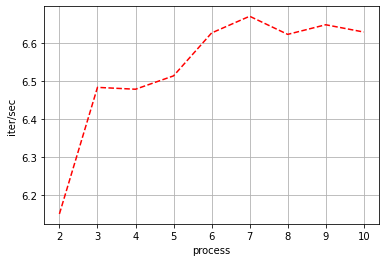

In [57]:
itersec_proc(250, 10, 10)